<a href="https://colab.research.google.com/github/GordanY/tensorflow-learning/blob/master/CNN_with_fashion_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import tensorflow as tf
import tensorflow_datasets as tfds
import math
import numpy as np
import matplotlib.pyplot as plt

In [15]:
ds, md = tfds.load("fashion_mnist", as_supervised = True, with_info = True)
train_ds, test_ds = ds["train"], ds["test"]

In [16]:
def normalize(datas, labels):
  datas = tf.cast(datas, tf.float32) / 255
  return datas, labels


train_ds, test_ds = train_ds.map(normalize), test_ds.map(normalize)

In [17]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), padding='same', activation=tf.nn.relu,
                           input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [18]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [19]:
BATCH_SIZE = 32
train_ds = train_ds.cache().repeat().shuffle(md.splits["train"].num_examples).batch(BATCH_SIZE)
test_ds = test_ds.cache().batch(BATCH_SIZE)

In [20]:
history = model.fit(train_ds, epochs=5, steps_per_epoch=math.ceil(md.splits["train"].num_examples/BATCH_SIZE))

Epoch 1/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3973 - accuracy: 0.8564
Epoch 2/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2645 - accuracy: 0.9040
Epoch 3/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2203 - accuracy: 0.9194
Epoch 4/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1862 - accuracy: 0.9313
Epoch 5/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1629 - accuracy: 0.9399


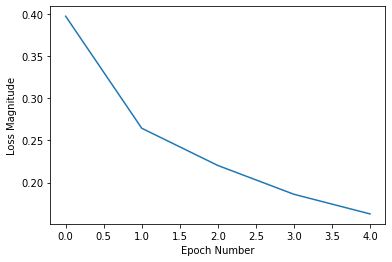

In [21]:
plt.xlabel('Epoch Number')
plt.ylabel("Loss Magnitude")
plt.plot(history.history['loss'])

In [24]:
test_loss, test_accuracy = model.evaluate(test_ds, steps=math.ceil(md.splits["test"].num_examples/32))
print('accuracy:', test_accuracy*100, "%")

313/313 [==============================] - 1s 3ms/step - loss: 0.2456 - accuracy: 0.9149
accuracy: 91.4900004863739 %


index? (0-31)1
labels:  4
prediction:  4


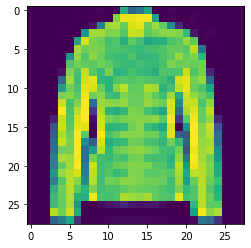

In [23]:
for test_images, test_labels in test_ds.take(1):

    test_images_n = test_images.numpy()
    test_labels_n = test_labels.numpy()
    predictions = model.predict(test_images_n)

    i = int(input("index? (0-31)"))
    
    plt.imshow(test_images[i].numpy().reshape((28,28)))
    print("labels: ", test_labels_n[i])
    print("prediction: ", np.argmax(predictions[i]))